# Autoencoder-Example 
Source: http://blog.keras.io/building-autoencoders-in-keras.html

In [16]:
%matplotlib inline
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import os.path as op
import math
import re
import seaborn as sns
sns.set_style("dark")
sns.set_context("notebook")

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers

Using Theano backend.


In [4]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784 * 3,))
# "encoded" is the encoded representation of the input
# add a Dense layer with a L1 activity regularizer
# encoded = Dense(encoding_dim, activation='relu',
#                 activity_regularizer=regularizers.activity_l1(10e-5))(input_img)
# "decoded" is the lossy reconstruction of the input
# decoded = Dense(784, activation='sigmoid')(encoded)

input_img = Input(shape=(784 * 3,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784 * 3, activation='sigmoid')(decoded)

autoencoder = Model(input=input_img, output=decoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]



encoder     = Model(input=input_img, output=encoded)
decoder     = Model(input=encoded_input, output=decoder_layer(encoded_input))
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
# classes = sorted([re.search("^.*_",op.basename(name)).group() for name in names])
data = [(imresize(imread(name),(28,28)))  for name in sorted(glob("/home/jakob/git/vir-2016/CBIR_Projekt/images/WebImages_71x6/*"))]

In [6]:
X = [np.reshape(d.astype('float32') / 255, 784 * 3) for d in data]
X = np.array(X)

x_train = X[[i for i in range(len(X)) if i % 6 != 0 ],:]
x_test  = X[[i for i in range(len(X)) if i % 6 == 0 ],:]

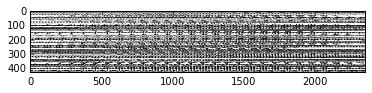

In [7]:
plt.imshow(X)
plt.gray()

In [8]:
x_train.shape

(355, 2352)

In [10]:
history  = autoencoder.fit(x_train, x_train,
                verbose=0,
                nb_epoch=1000,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

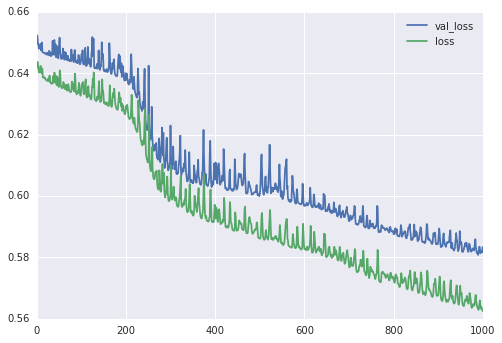

In [13]:
for key, data in history.history.items():
    plt.plot(data,label=key)
plt.legend(history.history.keys())

In [14]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

ValueError: total size of new array must be unchanged

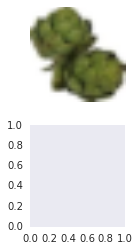

In [18]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(1,n):
    # display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28,3))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
decoded_imgs[1].shape

(64,)

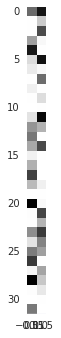

In [17]:
plt.imshow(decoded_imgs[1].reshape(32,2),interpolation="none")